!pip install textblob

----

In [1]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


# ```Importing libraries & Reading & Preprocessing the data```

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import warnings
import string
from nltk.corpus import stopwords
from textblob import Word
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
string.punctuation
%matplotlib inline

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("news.csv")
#df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fe

In [5]:
df.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


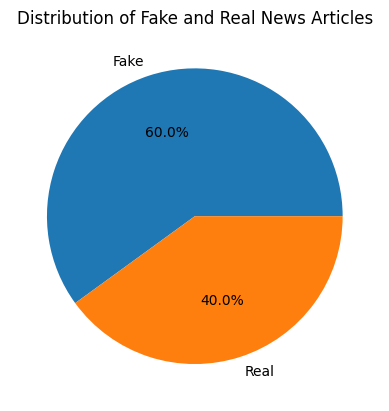

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load data as DataFrame
data = pd.DataFrame({
    "title": ["You Can Smell Hillary's Fear", "Watch The Exact Moment Paul Ryan Committed Political Suicide", "Kerry to go to Paris in gesture of sympathy", "Kaydee King (@KaydeeKing) November 9, 2016 Thanks Obama", "The Battle of New York: Why This Primary Matters"],
    "label": ["FAKE", "FAKE", "REAL", "FAKE", "REAL"]
})

# Get the number of fake and real news articles
n_fake = len(data[data["label"] == "FAKE"])
n_real = len(data[data["label"] == "REAL"])

# Create a pie chart of the number of fake and real news articles
plt.pie([n_fake, n_real], labels=["Fake", "Real"], autopct="%1.1f%%")
plt.title("Distribution of Fake and Real News Articles")
plt.show()


In [7]:
df = df.drop(['title', 'Unnamed: 0'], axis=1)

* Checks the Nulls

In [8]:
print(df.isnull().sum())

text     0
label    0
dtype: int64


In [9]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

* "remove_punctuation" that takes a text input and removes all punctuation characters from it.

In [10]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

* "tokenization" that takes a text input and splits it into tokens using regular expressions to identify word boundaries.

In [11]:
import re
def tokenization(text):
    tokens = re.split('w+',text)
    return tokens

*  "remove_stopwords", eliminates stopwords from a given text.

In [12]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [13]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [14]:
df['text']= df['text'].apply(lambda x:remove_punctuation(x))

* Convert the text to lowercase.

In [15]:
df['text']= df['text'].apply(lambda x: x.lower())

In [16]:
df['text']= df['text'].apply(lambda x: tokenization(x))

In [17]:
df['text']= df['text'].apply(lambda x:remove_stopwords(x))

* Applies lemmatization to the text by reducing each word to its base.

In [18]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [19]:
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Zyed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['text']=df['text'].apply(lambda x:lemmatizer(x))

In [21]:
x_df = df['text']
y_df = df['label']

In [22]:
x_df = x_df.apply(str)

* Transforms text data into a TF-IDF matrix CountVectorizer and TfidfTransformer.

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)
freq_term_matrix = count_vectorizer.transform(x_df)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
print(tf_idf_matrix)

  (0, 90592)	0.010735297331443633
  (0, 90568)	0.029615593926938338
  (0, 90550)	0.023701454027618987
  (0, 90397)	0.01724944431169106
  (0, 86365)	0.01966570109428591
  (0, 86210)	0.021193679354062335
  (0, 86209)	0.04709420684498068
  (0, 86076)	0.04398707731911909
  (0, 85714)	0.017562073492752524
  (0, 85584)	0.01899634702881034
  (0, 85377)	0.019731889332214057
  (0, 85188)	0.014495644284147005
  (0, 85012)	0.028034066945809084
  (0, 84735)	0.07503268639042851
  (0, 84568)	0.02223522209797466
  (0, 84378)	0.02454736328664017
  (0, 84108)	0.030223955789094932
  (0, 83736)	0.02231421523350678
  (0, 83282)	0.01248978283937693
  (0, 83278)	0.02833624366016998
  (0, 83109)	0.01795938678926155
  (0, 83104)	0.01787212698409556
  (0, 82684)	0.025668494002102187
  (0, 82677)	0.02584198674978434
  (0, 82124)	0.021275009410901408
  :	:
  (6334, 8115)	0.03482167758914517
  (6334, 8085)	0.023110987366872858
  (6334, 8082)	0.02377949181203283
  (6334, 8081)	0.031571735865049765
  (6334, 8078)	0

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,y_df, random_state=0)

# ```Modeling ```

###LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

91.47727272727273


In [26]:
y_pred = logreg.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[708  59]
 [ 76 741]]


###NAIVE BAYES

In [27]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)
print(Accuracy*100)

80.87121212121212


In [28]:
y_pred = logreg.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[708  59]
 [ 76 741]]


### DECISION TREE

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
Accuracy = clf.score(x_test, y_test)
print(Accuracy*100)

82.89141414141415


### PASSIVE-AGGRESSIVE CLASSIFIER

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
 #Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score,2)}')

Accuracy: 0.94
